In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Social Network Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
# mengambil field yang dibutuhkan
x = df.iloc[:, [2,3]].values
y = df.iloc[:, -1].values

In [4]:
# membagi data uji dan data latih
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [5]:
# scaling data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [7]:
y_pred = classifier.predict(x_test)

In [8]:
from sklearn.metrics import confusion_matrix
cm =  confusion_matrix(y_test, y_pred)
print(cm)

[[64  4]
 [ 3 29]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


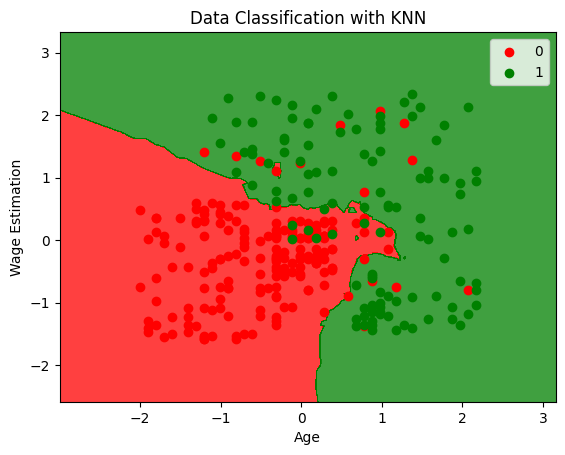

In [9]:
from matplotlib.colors import ListedColormap

x_set, y_set = x_train, y_train

x1, x2 = np.meshgrid(
    np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
    np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01)
)

Z = classifier.predict(np.array([x1.ravel(), x2.ravel()]).T)
Z = Z.reshape(x1.shape)

plt.contourf(x1, x2, Z, alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate (np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1 ],c=ListedColormap(('red', 'green'))(i), label = j)

plt.title('Data Classification with KNN')
plt.xlabel('Age')
plt.ylabel('Wage Estimation')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


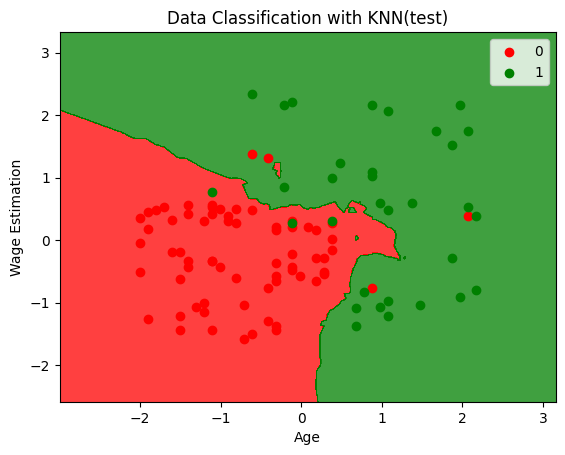

In [10]:
from matplotlib.colors import ListedColormap

x_set, y_set = x_test, y_test

x1, x2 = np.meshgrid(
    np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
    np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01)
)

Z = classifier.predict(np.array([x1.ravel(), x2.ravel()]).T)
Z = Z.reshape(x1.shape)

plt.contourf(x1, x2, Z, alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate (np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1 ],c=ListedColormap(('red', 'green'))(i), label = j)

plt.title('Data Classification with KNN(test)')
plt.xlabel('Age')
plt.ylabel('Wage Estimation')
plt.legend()
plt.show()